In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classLabels = []
file_name = 'coco.names'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)


< cv2.dnn.Model 000002C1E2EB66B0>

In [8]:
img = cv2.imread('man.jpg')

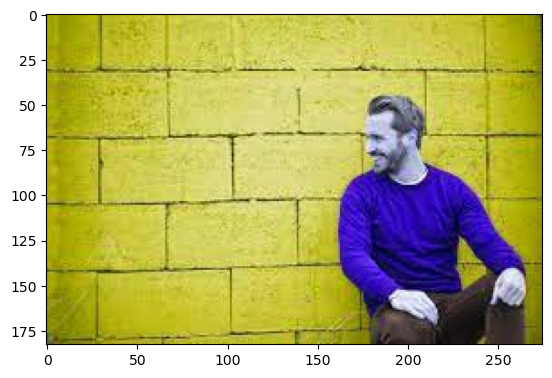

In [9]:
plt.imshow(img)

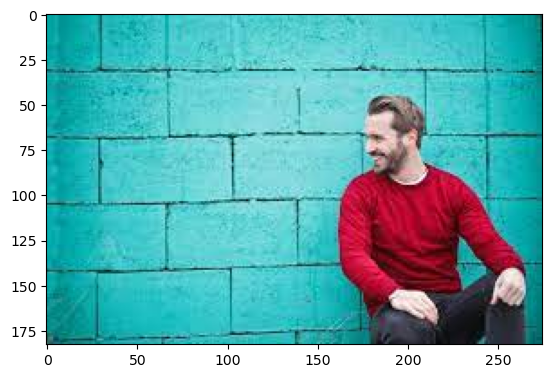

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidence, bbox= model.detect(img, confThreshold=0.5)

In [12]:
print(ClassIndex)

[1]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color =(0, 255, 0), thickness =3)

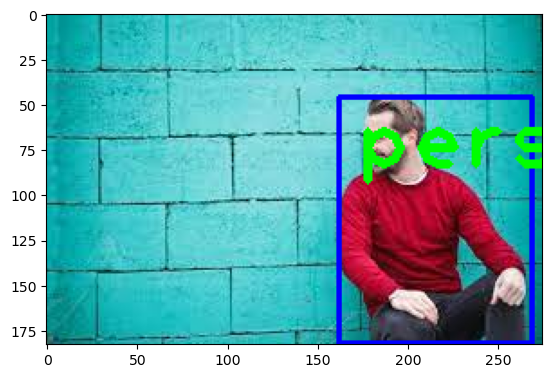

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [15]:
cap = cv2.VideoCapture("video.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture frame. Exiting...")
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

        cv2.imshow('Object Detection', frame)

        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


[1 1 3 3 3 1 3 3 3 1]
[1 1 3 3 3 1 3 3 3 3]
[1 3 3 1 3 3 1 3 3 1]
[1 3 3 1 3 3 3 1 3 1 3]
[3 3 3 1 3 3 1 1 1 1 3 3]
[3 3 3 1 1 3 1 3 1 1 3 3]
[3 3 1 3 3 1 1 1 3 3 1 3]
[3 3 1 3 1 3 3 1 3 1 1 1 3]
[3 3 1 3 3 1 3 1 1 3 1 3]
[1 3 3 3 3 1 3 1 1 3 3]
[1 3 3 1 3 3 3 1 1 3]
[1 3 3 3 3 1 3 1 3 1]
[1 3 1 3 3 3 3 3 1 1 3]
[1 3 3 1 3 3 3 3 1 1]
[1 1 3 3 3 1 3 3 1 3 3]
[1 3 1 1 3 3 3 3 3 3 1]
[1 3 1 3 3 3 1 3 3 3 1]
[3 1 1 1 3 3 3 3 1 3 3]
[1 3 1 3 3 3 1 1 3 3 3]
[3 1 3 3 1 3 3 1 3 3]
[1 3 3 3 1 3 3 1 1 1 3 1]
[1 3 3 1 1 1 3 3 1 3 3 1]
[1 3 1 3 3 3 1 3 3 1]
[3 1 1 1 3 3 3]
[1 1 3 3 1 3 3]
[3 1 3 3 1 1 3 3]
[1 3 3 1 3 3 3 3 3 1]
[1 3 1 1 3 3 1 1 3 3 1 1]
[1 1 3 1 3 3 1 3]
[1 3 1 1 3 3 1 8 1]
[1 3 3 3 1 1]
[1 1 3 3 1 3 3 3]
[1 3 1 3 3 1 3 1 3]
[1 3 1 1 3 3 1]
[1 1 3 3 1 1]
[1 3 1 3 1]
[1 1 3 1 3 1 3 3]
[1 1 1 3 3 3 1 3]
[3 1 1 1 3 3 3]
[3 3 1 1 3 3 3]
[3 3 3 3 1]
[3 3 1 3 1 3]
[3 3 3 1 3 3 3 1 3]
[3 3 3 3 1 3 3 1 1 3 1 3]
[3 3 3 3 3]
[3 3 3 1 3 3 1 1 1]
[1 3 1 1 3 3 3 1 1 3 1]
[1 3 3 1 3 1]
[3 1 3 1

In [ ]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    if not ret:
        print("Failed to capture frame. Exiting...")
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    print(ClassIndex)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

        cv2.imshow('Object Detection', frame)

        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 65]
[ 1 65]
[ 1 65]
[ 1 65]
[1]
[ 1 65]
[1]
[1]
[ 1 65]
[ 1 65 65]
[ 1 65]
[ 1 65]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


In [72]:
cap.release()
cv2.destroyAllWindows()
